# Analysis of the VintedStore Data


## Finding Differences between Men and Women in Clothing:

This is supposed to be a simple demonstration of what we can do with the data that can be provided by the webscrabber.

Import required Packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read the dataset and clean it.

In [2]:
col_names1 = ['Username', 'Likes', 'Size',  'Style', 'Price(€)', 'URL', 'Member Adress' ]

data1 = pd.read_csv('data/full_data.csv', names = col_names1 )

data1 = data1.replace('\€','',regex=True)
data1 = data1.replace('\,','.',regex=True)

data1["Price(€)"] = pd.to_numeric(data1["Price(€)"], downcast="float")

data1.head()


,Username,Likes,Size,Style,Price(€),URL,Member Adress
0,uz1111,3,XL,Replay,8.0,https://www.vinted.de/herren/kleidung/tops-and...,https://www.vinted.de/member/65706702-uz1111
1,illz,15,XL,Vintage,35.0,https://www.vinted.de/herren/kleidung/tops-and...,https://www.vinted.de/member/43707297-illz
2,martymcfly14700,3,XS,Kith,79.0,https://www.vinted.de/herren/kleidung/tops-and...,https://www.vinted.de/member/43844982-martymcf...
3,uncle_dan,18,M,Vintage,35.0,https://www.vinted.de/herren/kleidung/tops-and...,https://www.vinted.de/member/65661162-uncledan
4,nloew,21,M,6pm,60.0,https://www.vinted.de/herren/kleidung/tops-and...,https://www.vinted.de/member/43787172-nloew


In the folllowing plot, the values of price and Likes are plotted, this shall only be an instance from what we could infer a relation between the two variables price and number of likes.

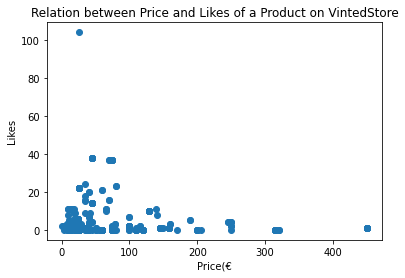

In [4]:
fig, ax = plt.subplots()

ax.scatter(data1['Price(€)'], data1['Likes'])
ax.set(xlabel='Price(€', ylabel='Likes')
ax.set(title='Relation between Price and Likes of a Product on VintedStore')

plt.show()

Nex we will look at another dataset:

Read in another dataset, which also contains information about whether the product was made for women or men, further it also displays the kind of product.


In [5]:
col_names = ['Gender', 'Type', 'Username', 'Likes', 'Size',  'Style', 'Price(€)', 'URL', 'Member Adress' ]

data = pd.read_csv('data/hallo.csv', names=col_names)

data = data.replace('\€','',regex=True)
data = data.replace('\,','.',regex=True)

data["Price(€)"] = pd.to_numeric(data["Price(€)"], downcast="float")

data.head()


,Gender,Type,Username,Likes,Size,Style,Price(€),URL,Member Adress
0,female,turnschuhe,akecheta1966,1,42,Adidas,29.0,https://www.vinted.de/herren/schuhe/sportschuh...,https://www.vinted.de/member/61465264-akecheta...
1,female,turnschuhe,snupmueller,20,42,Nike,129.0,https://www.vinted.de/herren/schuhe/sportschuh...,https://www.vinted.de/member/44328704-snupmueller
2,female,turnschuhe,tr2011,1,42,Adidas,450.0,https://www.vinted.de/herren/schuhe/sportschuh...,https://www.vinted.de/member/53487353-tr2011
3,female,turnschuhe,meljess88,26,37,Adidas,25.0,https://www.vinted.de/damen/schuhe/turnschuhe/...,https://www.vinted.de/member/44898204-meljess88
4,female,turnschuhe,bubumaster3,0,42,Nike,215.0,https://www.vinted.de/herren/schuhe/sportschuh...,https://www.vinted.de/member/44005622-bubumaster3


We will split the dataset by gender:

In [6]:
dataMale = data[data['Gender'] == 'male']
print(dataMale.head(5))
dataFemale = data[data['Gender'] == 'female']
print(dataFemale.head(5))


   Gender         Type       Username  Likes Size   Style  Price(€)  \
24   male  sportschuhe        fundayy      2   37    Nike      20.0   
25   male  sportschuhe       jonasrbo      7   36    Nike     450.0   
26   male  sportschuhe       irem1810      1   36    Nike       6.0   
27   male  sportschuhe  jonathan71715      0   42  Adidas      45.0   
28   male  sportschuhe         xaurus      1   42    Nike      65.0   

                                                  URL  \
24  https://www.vinted.de/damen/schuhe/turnschuhe/...   
25  https://www.vinted.de/damen/schuhe/turnschuhe/...   
26  https://www.vinted.de/damen/schuhe/turnschuhe/...   
27  https://www.vinted.de/herren/schuhe/sportschuh...   
28  https://www.vinted.de/herren/schuhe/sportschuh...   

                                        Member Adress  
24      https://www.vinted.de/member/59856215-fundayy  
25     https://www.vinted.de/member/45816972-jonasrbo  
26     https://www.vinted.de/member/58764149-irem1810  
27  ht

First of all we want to compare some measures of central tendency, therefore we want to compare the total number of products available for men and women:


In [7]:
print('Number of products available for women:', len(dataFemale))
print('Number of products available for men:', len(dataMale))

Number of products available for women: 72
Number of products available for men: 144


Secondly we want to look at the average price for products that were categorized female or male.

In [8]:
print('The mean price of women products:', dataFemale['Price(€)'].mean(),'€')
print('The mean price of men products:', dataMale['Price(€)'].mean(),'€')

The mean price of women products: 112.79139 €
The mean price of men products: 66.548546 €


Since we wanted to investigate differences in the results of the VintedStore,  we will focus on the difference between the stayle/brand of the article and the price.

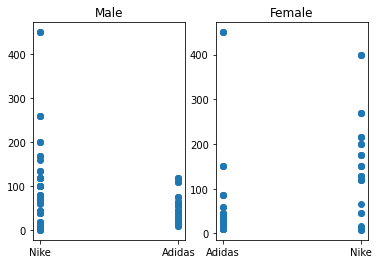

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].scatter(dataMale['Style'], dataMale['Price(€)'])


axes[1].scatter(dataFemale['Style'], dataFemale['Price(€)'])


axes[0].set(title="Male")
axes[1].set(title="Female")

plt.show()

The price for male products seem to be higher, with regard of the total number of products respectively for male and female, which was larger for male.

Secondly the differences of the size and the price will be shown between the genders.

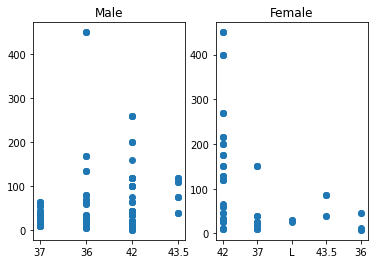

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].scatter(dataMale['Size'], dataMale['Price(€)'])
axes[1].scatter(dataFemale['Size'], dataFemale['Price(€)'])

axes[0].set(title="Male")
axes[1].set(title="Female")

plt.show()

We are aware that these visualizations are not very sophisticated but we were keen to have a try with data we provided our selves by the main part of the project; the scrapper itself. Eventhough this analysis does not allow any inferences, it inspired us how data analysis might work and is even accessible to us.